In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv(r"C:\Users\Sai Krishna\Downloads\Dataset_spine.csv")

In [3]:
data.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att,Unnamed: 13
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal,NaN
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal,NaN
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal,Prediction is done by using binary classificat...
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal,NaN
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal,NaN


In [4]:
data=data.drop(['Unnamed: 13'],axis=1)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 13 columns):
Col1         310 non-null float64
Col2         310 non-null float64
Col3         310 non-null float64
Col4         310 non-null float64
Col5         310 non-null float64
Col6         310 non-null float64
Col7         310 non-null float64
Col8         310 non-null float64
Col9         310 non-null float64
Col10        310 non-null float64
Col11        310 non-null float64
Col12        310 non-null float64
Class_att    310 non-null object
dtypes: float64(12), object(1)
memory usage: 31.6+ KB


In [6]:
data.columns = ['Pelvic Incidence','Pelvic Tilt','Lumbar Lordosis Angle','Sacral Slope','Pelvic Radius', 
                'Spondylolisthesis Degree', 'Pelvic Slope', 'Direct Tilt', 'Thoracic Slope', 
                'Cervical Tilt','Sacrum Angle', 'Scoliosis Slope','Outcome']

In [7]:
data.head() 

,Pelvic Incidence,Pelvic Tilt,Lumbar Lordosis Angle,Sacral Slope,Pelvic Radius,Spondylolisthesis Degree,Pelvic Slope,Direct Tilt,Thoracic Slope,Cervical Tilt,Sacrum Angle,Scoliosis Slope,Outcome
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal


In [8]:
data.Outcome = [1 if val=='Abnormal' else 0 for val in data.Outcome]

In [9]:
data.Outcome.value_counts()

1    210
0    100
Name: Outcome, dtype: int64

In [10]:
data.describe()

,Pelvic Incidence,Pelvic Tilt,Lumbar Lordosis Angle,Sacral Slope,Pelvic Radius,Spondylolisthesis Degree,Pelvic Slope,Direct Tilt,Thoracic Slope,Cervical Tilt,Sacrum Angle,Scoliosis Slope,Outcome
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,0.472979,21.321526,13.064511,11.933317,-14.053139,25.645981,0.677419
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,0.285787,8.639423,3.399713,2.893265,12.225582,10.450558,0.468220
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,0.003220,7.027000,7.037800,7.030600,-35.287375,7.007900,0.000000
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,0.224367,13.054400,10.417800,9.541140,-24.289522,17.189075,0.000000
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,0.475989,21.907150,12.938450,11.953835,-14.622856,24.931950,1.000000
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,0.704846,28.954075,15.889525,14.371810,-3.497094,33.979600,1.000000
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082,0.998827,36.743900,19.324000,16.821080,6.972071,44.341200,1.000000


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

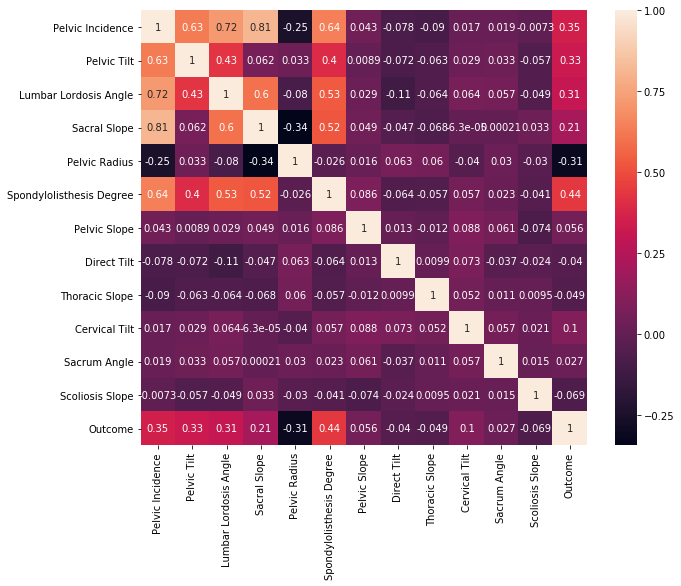

In [12]:
corr = data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True)

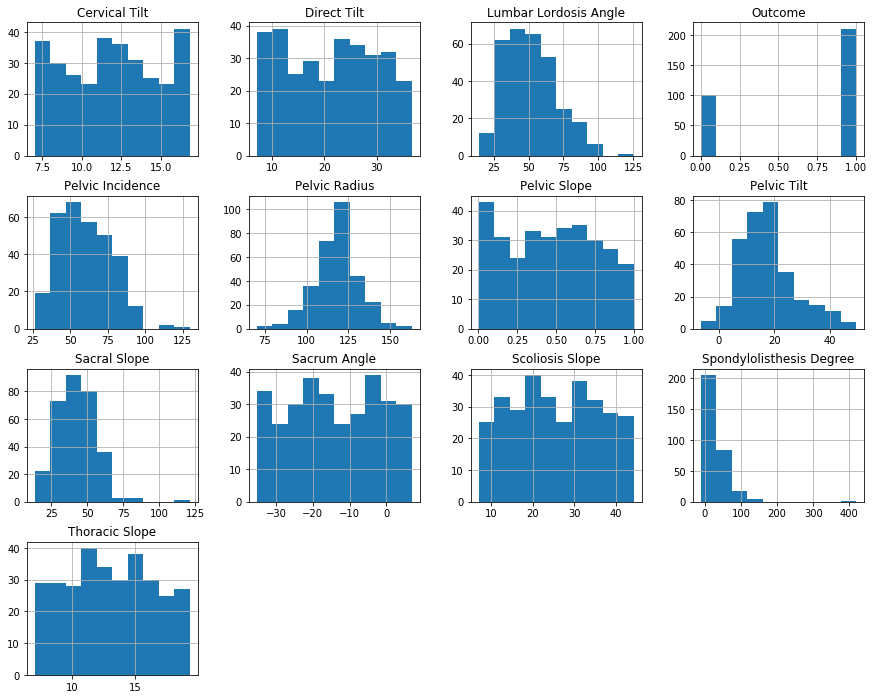

In [13]:
data.hist(figsize=(15,12))
plt.title('Features Distribution')
plt.show()

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
rf = RandomForestClassifier()

In [24]:
rf.fit(x_train, y_train) 
## And score it on your testing data.

C:\Users\Sai Krishna\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8172043010752689

In [25]:
rf.score(x_test, y_test)

0.8172043010752689

In [26]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = x_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

In [29]:
feature_importances

,importance
Spondylolisthesis Degree,0.339312
Lumbar Lordosis Angle,0.115108
Pelvic Radius,0.105291
Sacral Slope,0.087665
Pelvic Tilt,0.060153
Pelvic Incidence,0.052013
Cervical Tilt,0.045508
Sacrum Angle,0.045130
Scoliosis Slope,0.042724
Pelvic Slope,0.039284


In [17]:
X= data.drop(columns='Outcome')
y = np.array(data['Outcome'])

In [18]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size =0.3,random_state =15)

In [19]:
from sklearn.linear_model import LogisticRegression
logm = LogisticRegression()
logm.fit(x_train,y_train)
prediction = logm.predict(x_test)

C:\Users\Sai Krishna\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [20]:
from sklearn.metrics import accuracy_score,confusion_matrix

log_acc_score  = accuracy_score(y_test,prediction)
print('accuracy score of logistic model is : {}'.format(log_acc_score))


accuracy score of logistic model is : 0.8602150537634409


In [21]:
pd.DataFrame(confusion_matrix(y_test,prediction),columns=['Normal','Abnormal'],index=['Normal','Abnormal'])

,Normal,Abnormal
Normal,24,4
Abnormal,9,56


In [22]:
x_train2,x_test2,y_train2,y_test2 = train_test_split(X,y,test_size=0.3,random_state=15)

n_trees =[10,50,100,200,300]
for i in n_trees:
    rand = RandomForestClassifier(n_estimators =i)
    rand.fit(x_train2,y_train2)
    pred = rand.predict(x_test2)
    print('n of trees :{}',format(i))
    acc_pred = 0
    
    for j,k in zip(y_test2,pred):
        if j==k :
            acc_pred += 1
    print('correct predictions: {}'.format(acc_pred/len(y_test2) *100))
    matrix = pd.DataFrame(confusion_matrix(y_test2,prediction),columns=['Normal','Abnormal'],index=['Normal','Abnormal'])
    print(matrix)
    
            

n of trees :{} 10
correct predictions: 77.41935483870968
          Normal  Abnormal
Normal        24         4
Abnormal       9        56
n of trees :{} 50
correct predictions: 82.79569892473118
          Normal  Abnormal
Normal        24         4
Abnormal       9        56
n of trees :{} 100
correct predictions: 81.72043010752688
          Normal  Abnormal
Normal        24         4
Abnormal       9        56
n of trees :{} 200
correct predictions: 81.72043010752688
          Normal  Abnormal
Normal        24         4
Abnormal       9        56
n of trees :{} 300
correct predictions: 81.72043010752688
          Normal  Abnormal
Normal        24         4
Abnormal       9        56
